<a href="https://colab.research.google.com/github/Ananassio/Data-Minig-Lab/blob/main/Week_4/Assignment_face_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Face recognition with non-linear eigenfaces 

### Data: ["Labeled Face in the Wild"](http://vis-www.cs.umass.edu/lfw/index.html)

In [16]:
# basic imports
from time import time #to compute runtimes
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
import pandas as pd

### Get Data


In [2]:
from sklearn.datasets import fetch_lfw_people #data is part of Scikit Learn

lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4) #get data - take some time

In [3]:
# get data shapes
n_samples, h, w = lfw_people.images.shape
print(n_samples, h, w)

1288 50 37


In [4]:
# get data and labels
X = lfw_people.data #data
y = lfw_people.target #labels

In [5]:
n_features = X.shape[1] #get size of images
print("number of pixels per image:", n_features)

target_names = lfw_people.target_names #get unique IDs of people
n_classes = target_names.shape[0]

print("names of people", target_names)
print("number of people in DB:", n_classes)

number of pixels per image: 1850
names of people ['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Tony Blair']
number of people in DB: 7


Text(0.5, 1.0, 'George W Bush')

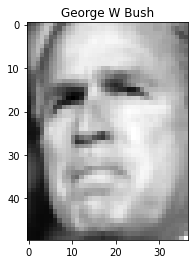

In [6]:
#vis example
plt.gray()
plt.imshow(X[12,:].reshape(h,w))
plt.title(target_names[y[12]])

## ML Model

### Task 1: Split in test and train set
* 20% test - 80% train -> use SKL split function!

In [8]:
 X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

### Task 1: Apply Kernel-PCA to train data
* Plot Eigenvalues (explained variance) and find cut-off 
* Project all data (train+test) to Eigen-Face-Space

HINT: use *whitenig* in the PCA -> normalization of the components

-> see [https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.KernelPCA.html](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.KernelPCA.html)

In [10]:
from sklearn.decomposition import PCA #import PCA

In [45]:
pca = PCA(whiten=True)
pca.fit(X_train)

PCA(whiten=True)

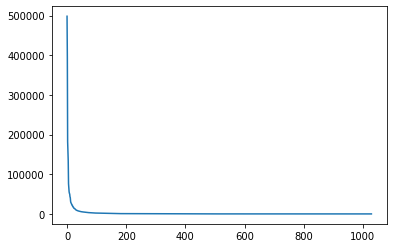

In [46]:
#plot Eigen-Values
plt.plot(pca.explained_variance_)

Cut-off bei 100


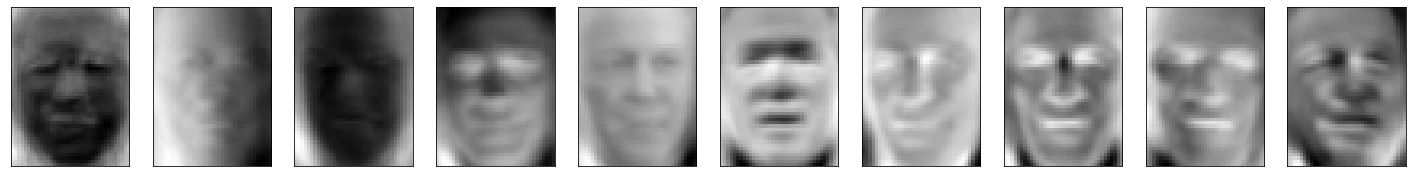

In [64]:
#have look at the first 10 Eigen-Vectors
# only train set
fig, ax = plt.subplots(1, 10, figsize=(25,16))
for i in range(10):
    ax[i].imshow(pca.components_[i].reshape(50,37))
    ax[i].set_yticks([])
    ax[i].set_xticks([])

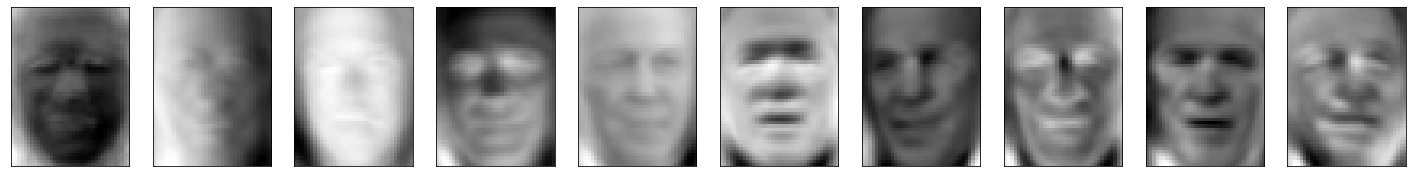

In [65]:
pca = PCA(whiten=True)
pca.fit(X)
#have look at the first 10 Eigen-Vectors
#train and test set
fig, ax = plt.subplots(1, 10, figsize=(25,16))
for i in range(10):
    ax[i].imshow(pca.components_[i].reshape(50,37))
    ax[i].set_yticks([])
    ax[i].set_xticks([])

### Task 2: Visualize Faces in kernel-PCA space with Tensorflow projector 
* upload data (original data and in kPCA space) and lables
* use images or different colors for different people


In [67]:
from sklearn.decomposition import KernelPCA
#kpca=KernelPCA(kernel='linear')
kpca=KernelPCA(kernel="rbf", fit_inverse_transform=True, gamma=10 )
#kpca=KernelPCA(kernel="poly", fit_inverse_transform=True, degree= )

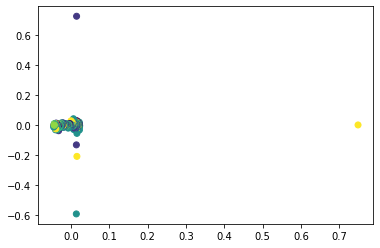

In [70]:
X_new = kpca.fit_transform(X) #apply base chage to data

plt.scatter(X_new[:,0],X_new[:,1], c=y, cmap='viridis')